In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [2]:
x_train = np.load("./X_train.npy")
y_train = np.load("./Y_train.npy")
x_test = np.load("./X_test.npy")

In [3]:
x_train.shape

(4160, 50, 50, 3)

In [10]:
x_train[0]

array([[[246., 245., 243.],
        [246., 244., 248.],
        [246., 245., 244.],
        ...,
        [229., 154., 182.],
        [231., 148., 179.],
        [228., 159., 184.]],

       [[245., 246., 246.],
        [246., 242., 244.],
        [248., 244., 247.],
        ...,
        [233., 156., 180.],
        [230., 175., 193.],
        [229., 187., 207.]],

       [[248., 243., 245.],
        [246., 244., 245.],
        [247., 244., 244.],
        ...,
        [221., 150., 181.],
        [228., 150., 181.],
        [201., 152., 182.]],

       ...,

       [[246., 242., 245.],
        [228., 212., 225.],
        [218., 181., 208.],
        ...,
        [211., 168., 191.],
        [227., 175., 199.],
        [218., 166., 192.]],

       [[246., 244., 246.],
        [231., 212., 225.],
        [245., 242., 244.],
        ...,
        [195., 158., 190.],
        [223., 182., 204.],
        [218., 171., 200.]],

       [[242., 236., 241.],
        [244., 238., 239.],
        [242., 2

In [5]:
y_train.shape

(4160,)

In [6]:
y_train

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

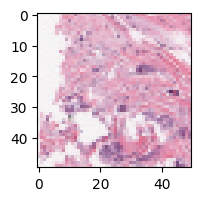

In [19]:
plt.figure(figsize=(2,2))
plt.imshow(x_train[0]/255)

In [20]:
y_train[0]

1

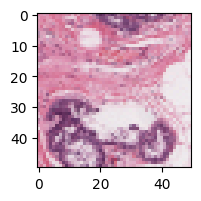

In [21]:
plt.figure(figsize=(2,2))
plt.imshow(x_train[1]/255)

In [22]:
y_train[1]

0

In [23]:
#normalization of data
x_train=x_train / 255
x_test = x_test / 255

In [24]:
 #CNN model using tensorflow library
 cnn = models.Sequential([
    layers.Conv2D(filters = 32, kernel_size=(3,3), activation ='relu', input_shape=(50,50,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters = 64, kernel_size=(3,3), activation ='relu'),
    layers.MaxPooling2D((2,2)),

     layers.Flatten(),
     layers.Dense(64, activation = 'relu'),
     layers.Dense(2, activation = 'softmax')
    ])
 
cnn.compile(optimizer = 'adam',
            loss = 'sparse_categorical_crossentropy',
            metrics = ['accuracy'])

cnn.fit(x_train, y_train, epochs = 20)



Epoch 1/20
130/130 [==============================] - 12s 83ms/step - loss: 0.6684 - accuracy: 0.6031
Epoch 2/20
130/130 [==============================] - 11s 86ms/step - loss: 0.5857 - accuracy: 0.7017
Epoch 3/20
130/130 [==============================] - 11s 83ms/step - loss: 0.5422 - accuracy: 0.7341
Epoch 4/20
130/130 [==============================] - 11s 83ms/step - loss: 0.5225 - accuracy: 0.7474
Epoch 5/20
130/130 [==============================] - 11s 88ms/step - loss: 0.5181 - accuracy: 0.7481
Epoch 6/20
130/130 [==============================] - 10s 79ms/step - loss: 0.4988 - accuracy: 0.7661
Epoch 7/20
130/130 [==============================] - 11s 86ms/step - loss: 0.4983 - accuracy: 0.7702
Epoch 8/20
130/130 [==============================] - 12s 89ms/step - loss: 0.5046 - accuracy: 0.7651
Epoch 9/20
130/130 [==============================] - 12s 88ms/step - loss: 0.4847 - accuracy: 0.7743
Epoch 10/20
130/130 [==============================] - 12s 89ms/step - loss: 0.465

In [25]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 11, 11, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 7744)              0         
                                                                 
 dense (Dense)               (None, 64)                4

In [26]:
x_test.shape

(1387, 50, 50, 3)

In [27]:
y_pred = cnn.predict(x_test)
y_pred

44/44 [==============================] - 1s 19ms/step


array([[0.9970853 , 0.00291469],
       [0.4105583 , 0.5894417 ],
       [0.3186476 , 0.68135244],
       ...,
       [0.9923471 , 0.00765289],
       [0.90371615, 0.09628379],
       [0.0239268 , 0.97607315]], dtype=float32)

In [28]:
y_classes = [np.argmax(element) for element in y_pred]

In [29]:
yes = 0
no = 0
for element in y_classes:
    if (element == 1):
        yes+=1
    else:
        no+=1
print(yes, no, yes + no)

588 799 1387


In [30]:
#checking for the train data set for validation
y_pred2 = cnn.predict(x_train)
y_classes2 = [np.argmax(element) for element in y_pred2]
yes2 = 0
no2 = 0
for element in y_classes2:
    if (element ==1):
        yes2+=1
    else:
        no2+=1
print(yes2, no2, yes2 + no2)

130/130 [==============================] - 3s 24ms/step
1888 2272 4160


In [32]:
DF = pd.DataFrame(y_classes)
DF.to_csv("output.csv")